# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### Preparatory step

In [1]:

!pip install gymnasium
!pip install gymnasium[box2d]

   ---------------------------------------- 0.0/944.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.3 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.3 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.3 kB ? eta -:--:--
   --------------------- ---------------- 524.3/944.3 kB 453.5 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/944.3 kB 453.5 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/944.3 kB 453.5 kB/s eta 0:00:01
   ------------------------------- ------ 786.4/944.3 kB 479.2 kB/s eta 0:00:01
   -------------------------------------- 944.3/944.3 kB 479.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.4 MB/s eta 0:00:00
Failed to build box2d-py


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [29 lines of output]
  C:\Windows\Temp\pip-build-env-nrj553zs\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
    warnings.warn(msg)
  C:\Windows\Temp\pip-build-env-nrj553zs\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: zlib/libpng License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  Using setuptools (version 80.9.0).
  running bdist_wheel
  running build


In [3]:
#restart the kernel once after install this package
!pip3 install box2d box2d-kengz --user
!pip3 install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.4/425.4 kB 5.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-kengz: filename=Box2D_kengz-2.3.3-cp310-cp310-linux_x86_64.whl size=513307 sha256=cbc680f1244930a6284f2c165c06e54587a6cbe7d5deeb62bb2218673d92a95f
  Stored in directory: /home/student/.cache/pip/wheels/ab/a3/5f/6396406aa0163da86c2a8d28304a120b55cfa98363654d853b
Successfully built box2d-kengz
Defaulting to user installation because normal site-packages is not writeable


### Restart the Kernel
Restart the Kernel for the newly installed packages to take effect. 

### 1. Import the Necessary Packages

In [2]:
import torch
n_device = torch.cuda.current_device()
torch.cuda.get_device_name(n_device)

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [3]:
import gymnasium as gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

# !pip uninstall Box2D box2d-py swig -y
# !pip uninstall Box2D box2d-py -y
!pip install box2d-py
# !pip install "gym[box2d]"


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build box2d-py


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [29 lines of output]
  C:\Windows\Temp\pip-build-env-1v_uo5xa\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
    warnings.warn(msg)
  C:\Windows\Temp\pip-build-env-1v_uo5xa\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: zlib/libpng License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  Using setuptools (version 80.9.0).
  running bdist_wheel
  running build


### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [6]:
env = gym.make('LunarLander-v3')
# env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)

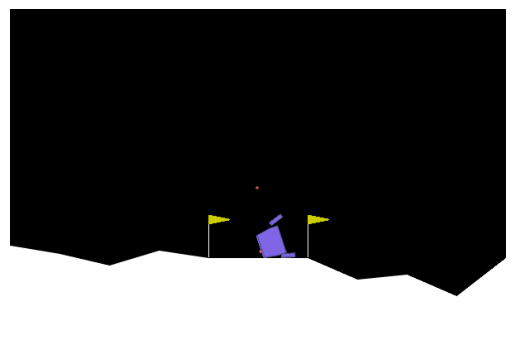

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display
from dqn_agent import Agent

# Create environment with RGB array rendering
env = gym.make("LunarLander-v3", render_mode="rgb_array")

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state, info = env.reset()  # Gymnasium: returns (obs, info)
frame = env.render()
img = plt.imshow(frame)
plt.axis('off')

for j in range(200):
    action = agent.act(state)
    next_state, reward, terminated, truncated, _ = env.step(action)
    
    frame = env.render()
    img.set_data(frame)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    state = next_state
    done = terminated or truncated
    if done:
        break

env.close()


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 100	Average Score: -163.57
Episode 200	Average Score: -112.06
Episode 300	Average Score: -34.280
Episode 400	Average Score: 4.0142
Episode 500	Average Score: 101.56
Episode 600	Average Score: 172.60
Episode 700	Average Score: 146.22
Episode 800	Average Score: 186.84
Episode 824	Average Score: 201.66
Environment solved in 724 episodes!	Average Score: 201.66


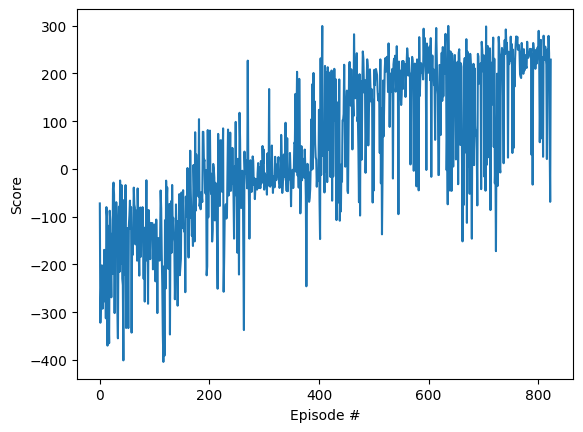

In [10]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state,_ = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, terminated,truncated, _ = env.step(action)
            agent.step(state, action, reward, next_state, terminated,truncated)
            state = next_state
            score += reward
            if terminated or truncated:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

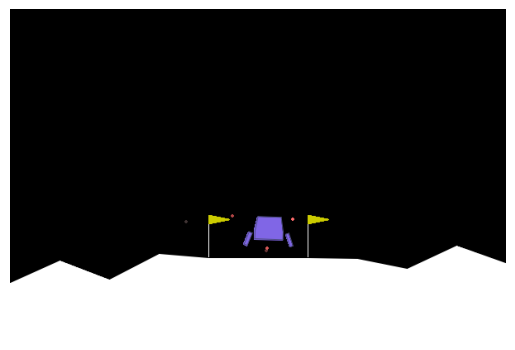

In [12]:
import torch
import matplotlib.pyplot as plt
from IPython import display
import gymnasium as gym
from dqn_agent import Agent

# Create environment with RGB array rendering
env = gym.make("LunarLander-v3", render_mode="rgb_array")

# Load agent and weights
agent = Agent(state_size=8, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load("checkpoint.pth"))

# Watch 3 episodes
for i in range(3):
    state, info = env.reset()  # Gymnasium: returns (obs, info)
    frame = env.render()
    img = plt.imshow(frame)
    plt.axis("off")
    
    for j in range(200):
        action = agent.act(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        frame = env.render()
        img.set_data(frame)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        state = next_state
        done = terminated or truncated
        if done:
            break

env.close()


### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  